<a href="https://colab.research.google.com/github/drajaysingh9/datasciencecoursera/blob/main/%5BBSE%5D_AR_Value_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AutoRegressive Model**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **AR(1)**


# Yt = C + coefficient * Yt-1 + error

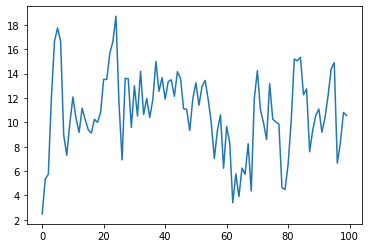

In [ ]:
# reproducibility
np.random.seed()

# create autocorrelated data
time = np.arange(100)


ar1_sample = np.zeros(100)

# Set our first number to a random value with expected mean of 0 and standard deviation of 2.5
ar1_sample[0] =3 + np.random.normal(loc=0, scale=2.5, size=1)



#  0.7 * the last term plus a random error
for t in time[1:]:
    ar1_sample[t] = 3 + (0.7 * ar1_sample[t-1]) + np.random.normal(loc=0, scale=2.5, size=1)

np.savetxt(fname="ar1.csv", delimiter=",", X=ar1_sample, fmt='%f')
plt.plot(time,ar1_sample)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


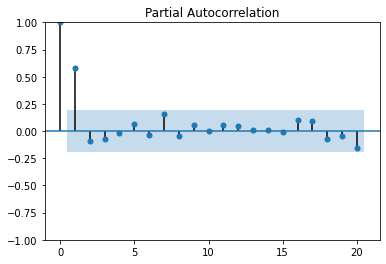

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(ar1_sample).show()

In [ ]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 5.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
ar1_model = AutoReg(ar1_sample, lags=1).fit()

In [ ]:
print(ar1_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -233.070
Method:               Conditional MLE   S.D. of innovations              2.548
Date:                Fri, 26 Nov 2021   AIC                            472.140
Time:                        12:02:33   BIC                            479.925
Sample:                             1   HQIC                           475.290
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6301      0.878      5.274      0.000       2.910       6.351
y.L1           0.5780      0.078      7.418      0.000       0.425       0.731
                                    Roots           

In [ ]:
pred1 = ar1_model.predict(start=0, end=len(ar1_sample), dynamic=False)

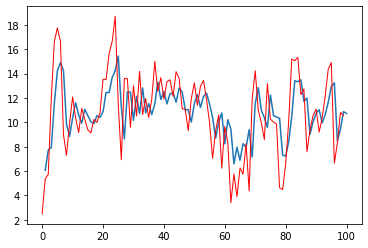

In [ ]:
plt.plot(pred1)
plt.plot(ar1_sample, color='red', linewidth=1)

In [ ]:
print('Coefficients: %s' % ar1_model.params)

Coefficients: [4.63013976 0.57796969]


# With 0 random error

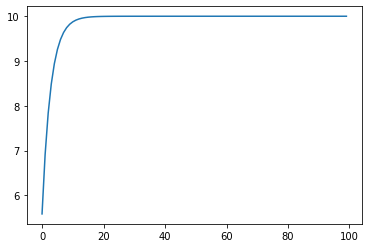

In [ ]:
# reproducibility
np.random.seed()

# create autocorrelated data
time = np.arange(100)


ar10_sample = np.zeros(100)

# Set our first number to a random value with expected mean of 0 and standard deviation of 2.5
ar10_sample[0] =3+ np.random.normal(loc=0, scale=2.5, size=1)



#  0.7 * the last term plus a random error
for t in time[1:]:
    ar10_sample[t] = 3 + (0.7 * ar10_sample[t-1])# + np.random.normal(loc=0, scale=2.5, size=1)

plt.plot(time,ar10_sample)

In [ ]:
ar10_model = AutoReg(ar10_sample, lags=1).fit()

In [ ]:
print(ar10_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                3152.863
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Fri, 26 Nov 2021   AIC                          -6299.726
Time:                        12:01:43   BIC                          -6291.941
Sample:                             1   HQIC                         -6296.576
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0000   5.87e-15   5.11e+14      0.000       3.000       3.000
y.L1           0.7000   5.95e-16   1.18e+15      0.000       0.700       0.700
                                    Roots           

In [ ]:
pred10 = ar10_model.predict(start=0, end=len(ar10_sample), dynamic=False)

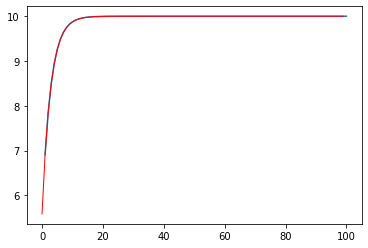

In [ ]:
plt.plot(pred10)
plt.plot(ar10_sample, color='red', linewidth=1)

In [ ]:
print('Coefficients: %s' % ar10_model.params)

Coefficients: [3.  0.7]


# **AR(2)**


# Yt = C + coefficien1 * Yt-1 + coefficient2 * Yt-2 + error

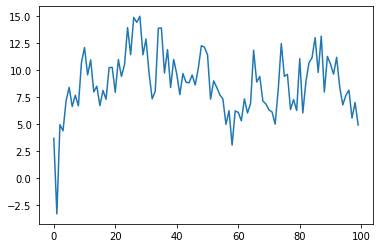

In [ ]:
# create autocorrelated data
np.random.seed()


# 
ar2_sample = np.zeros(100)



# Set first two values to random values with expected mean of 0 and standard deviation of 2.5
ar2_sample[0:2] =  np.random.normal(loc=0, scale=2.5, size=2)


# Set future values as 0.3 times the prior value and 0.4 times value two prior
for t in time[2:]:
    ar2_sample[t] = 3+ (0.3 * ar2_sample[t-1]) + (0.4 * ar2_sample[t-2])+ np.random.normal(loc=0, scale=2.5, size=1)

np.savetxt(fname="ar2.csv", delimiter=",", X=ar2_sample, fmt='%f')
plt.plot(time,ar2_sample)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


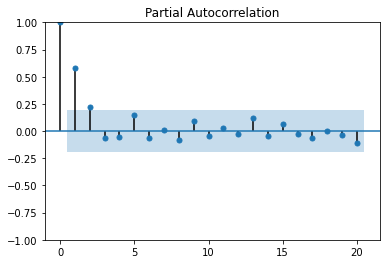

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(ar2_sample).show()

In [ ]:
ar2_model = AutoReg(ar2_sample, lags=2).fit()

In [ ]:
print(ar2_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(2)   Log Likelihood                -206.092
Method:               Conditional MLE   S.D. of innovations              1.982
Date:                Fri, 26 Nov 2021   AIC                            420.184
Time:                        11:42:55   BIC                            430.524
Sample:                             2   HQIC                           424.366
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3441      0.735      4.550      0.000       1.904       4.784
y.L1           0.3597      0.088      4.069      0.000       0.186       0.533
y.L2           0.2741      0.087      3.148      0.0

In [ ]:
pred2 = ar2_model.predict(start=0, end=len(ar2_sample), dynamic=False)

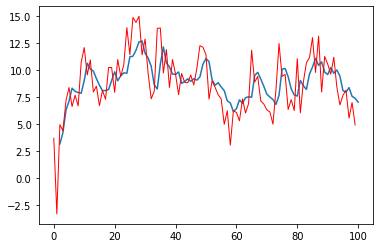

In [ ]:
plt.plot(pred2)
plt.plot(ar2_sample, color='red', linewidth=1)

In [ ]:
print('Coefficients: %s' % ar2_model.params)

Coefficients: [3.3440558  0.35971047 0.2741351 ]


# With 0 random error

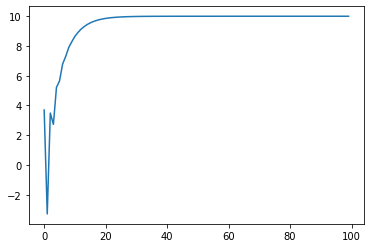

In [ ]:
# create autocorrelated data
np.random.seed(112)


# 
ar2_sample = np.zeros(100)



# Set first two values to random values with expected mean of 0 and standard deviation of 2.5
ar2_sample[0:2] =  np.random.normal(loc=0, scale=2.5, size=2)


# Set future values as 0.3 times the prior value and 0.3 times value two prior
for t in time[2:]:
    ar2_sample[t] = 3+ (0.3 * ar2_sample[t-1]) + (0.4 * ar2_sample[t-2]) #+ np.random.normal(loc=0, scale=2.5, size=1)

np.savetxt(fname="ar2.csv", delimiter=",", X=ar2_sample, fmt='%f')
plt.plot(time,ar2_sample)

In [ ]:
ar2_model = AutoReg(ar2_sample, lags=2).fit()
print(ar2_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(2)   Log Likelihood                3062.293
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Fri, 26 Nov 2021   AIC                          -6116.586
Time:                        11:45:34   BIC                          -6106.246
Sample:                             2   HQIC                         -6112.404
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0000   3.59e-15   8.37e+14      0.000       3.000       3.000
y.L1           0.3000   6.84e-16   4.39e+14      0.000       0.300       0.300
y.L2           0.4000   6.51e-16   6.14e+14      0.0

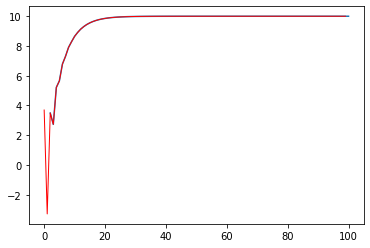

In [ ]:
pred2 = ar2_model.predict(start=0, end=len(ar2_sample), dynamic=False)
plt.plot(pred2)
plt.plot(ar2_sample, color='red', linewidth=1)

In [ ]:
print('Coefficients: %s' % ar2_model.params)

Coefficients: [3.  0.3 0.4]
